In [1]:
import numpy as np
 
import wave
 
import struct
 
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(28, 26), dpi= 80, facecolor='w', edgecolor='k')

plt.rcParams['figure.figsize'] = [10, 6.6]
 
# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0
 
amplitude = 16000
 
file = "test.wav"

I just setup the variables I have declared.

In [2]:
sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]

In [3]:
nframes=num_samples
 
comptype="NONE"
 
compname="not compressed"
 
nchannels=1
 
sampwidth=2

In [4]:

wav_file=wave.open(file, 'w')
 
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

In [5]:
for s in sine_wave:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))

We open the file and set the parameters.

This might require some explanation. We are writing the sine_wave sample by sample. writeframes is the function that writes a sine wave. All that is simple. This might confuse you:

struct.pack('h', int(s*amplitude))
So let’s break it down into parts.

int(s*amplitude)

int(s*amplitude)
s is the single sample of the sine_wave we are writing. I am multiplying it with the amplitude here (to convert to fixed point). We could have done it earlier, but I’m doing it here, as this is where it matters, when we are writing to a file.

s is the single sample of the sine_wave we are writing. I am multiplying it with the amplitude here (to convert to fixed point). We could have done it earlier, but I’m doing it here, as this is where it matters, when we are writing to a file.

Now,the data we have is just a list of numbers. If we write it to a file, it will not be readable by an audio player.

Struct is a Python library that takes our data and packs it as binary data. The h in the code means 16 bit number.

To understand what packing does, let’s look at an example in IPython

In [7]:
frame_rate = 48000.0
 
infile = "test.wav"
 
num_samples = 48000
 
wav_file = wave.open(infile, 'r')
 
data = wav_file.readframes(num_samples)
 
wav_file.close()

In [8]:

data = struct.unpack('{n}h'.format(n=num_samples), data)

In [9]:
data = np.array(data)


In [11]:
data_fft = np.fft.fft(data)

In [12]:
data_fft[:8]

array([13.        -2.01439743e-10j,  8.44107682-4.55121351e+00j,
        6.2469663 -1.19802755e+01j,  4.0951376 -2.63009999e+00j,
       -0.87934285+9.52378503e+00j,  2.62608334+3.58733642e+00j,
        4.89671762-3.36196984e+00j, -1.26176048+3.02345550e+00j])

If only there was a way to convert the complex numbers to real values we can use. Let’s try to remember our high school formulas for converting complex numbers to real…

Wait. Numpy can do that for us.

In [13]:
# This will give us the frequency we want
 
frequencies = np.abs(data_fft)

In [14]:

print("The frequency is {} Hz".format(np.argmax(frequencies)))

The frequency is 1000 Hz


np.argmax will return the highest frequency in our signal, which it will then print. As we have seen manually, this is at a 1000Hz (or the value stored at data_fft[1000]). And now we can plot the data too.

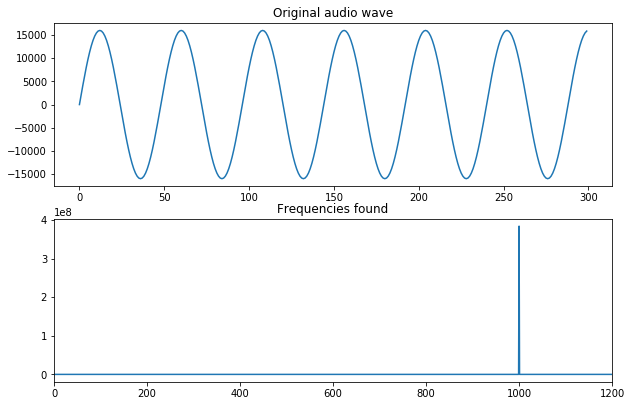

In [44]:

plt.subplot(2,1,1)
 
plt.plot(data[:300])
 
plt.title("Original audio wave")
 
plt.subplot(2,1,2)
 
plt.plot(frequencies)
 
plt.title("Frequencies found")
 
plt.xlim(0,1200)
 
plt.show()

In this example, I’ll recreate the same example my teacher showed me. We’ll generate a sine wave, add noise to it, and then filter the noise. Let’s start with the code.

In [16]:

# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
noisy_freq = 50
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0

In [17]:

#Create the sine wave and noise
 
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
 
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
 
sine_wave = np.array(sine_wave)
 
sine_noise = np.array(sine_noise)

I hope the above isn’t scary to you anymore, as it’s the same code as before. We generate two sine waves, one for the signal and one for the noise, and convert them to numpy arrays.

In [69]:
# Add them to create a noisy signal
 
combined_signal = sine_wave + sine_noise

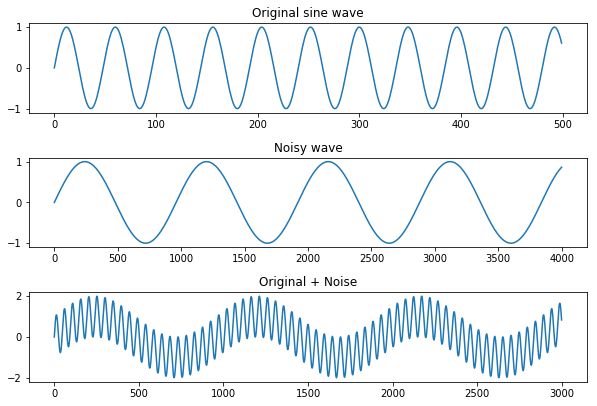

In [70]:

plt.subplot(3,1,1)
 
plt.title("Original sine wave")
 
# Need to add empty space, else everything looks scrunched up!
 
plt.subplots_adjust(hspace=0.5)
 
plt.plot(sine_wave[:500])
 
plt.subplot(3,1,2)
 
plt.title("Noisy wave")
 
plt.plot(sine_noise[:4000])
 
plt.subplot(3,1,3)
 
plt.title("Original + Noise")
 
plt.plot(combined_signal[:3000])
 
plt.show()

In [71]:

data_fft = np.fft.fft(combined_signal)
 
freq = (np.abs(data_fft[:len(data_fft)]))

<Figure size 2240x2080 with 0 Axes>

In [ ]:
change the plot size

(0, 1200)

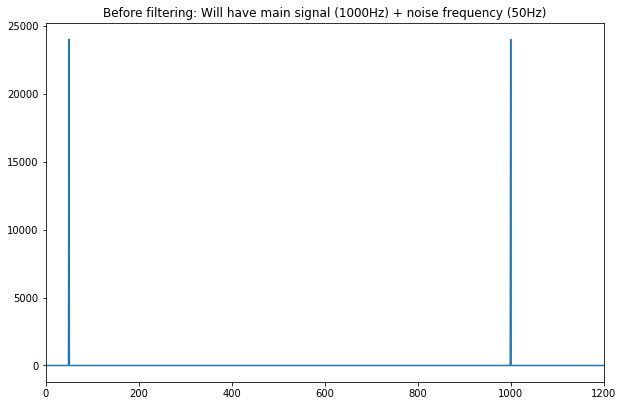

In [72]:

plt.plot(freq)
 
plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
 
plt.xlim(0,1200)

Now, to filter the signal. I won’t cover filtering in any detail, as that can take a whole book. Instead, I will create a simple filter just using the fft. The goal is to get you comfortable with Numpy.


In [87]:
filtered_freq = []
 
index = 0

In [89]:
for f in freq:
    # Filter between lower and upper limits
    # Choosing 950, as closest to 1000. In real world, won't get exact numbers like these
    if index > 950 and index < 1050:
        # Has a real value. I'm choosing >1, as many values are like 0.000000001 etc
        if f > 1:
            filtered_freq.append(f)
 
        else:
            filtered_freq.append(0)
    else:
        filtered_freq.append(0)
    index += 1

In [84]:
index

48001

In [81]:

filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(freq)]

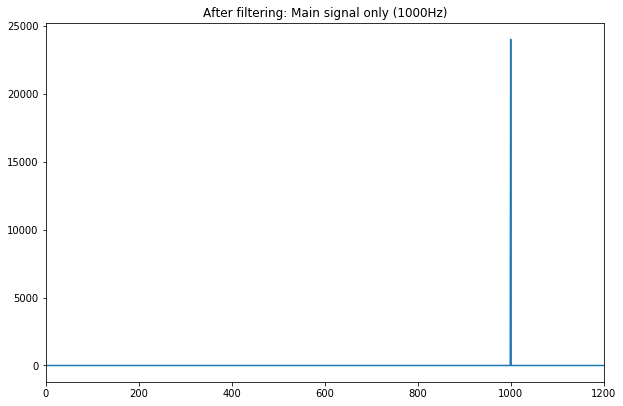

In [90]:

plt.plot(filtered_freq)
 
plt.title("After filtering: Main signal only (1000Hz)")
 
plt.xlim(0,1200)
 
plt.show()
 
plt.close()

In [51]:


recovered_signal = np.fft.ifft(filtered_freq)

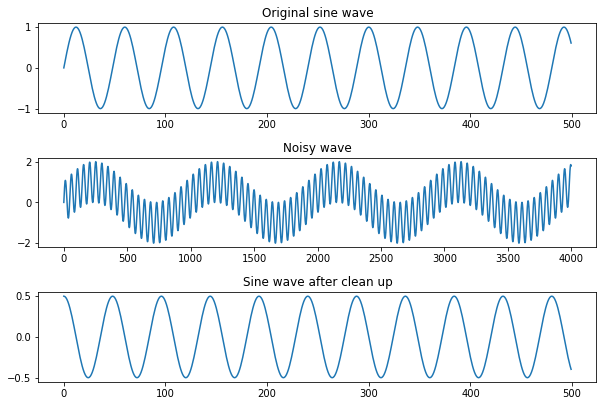

In [54]:

plt.subplot(3,1,1)
 
plt.title("Original sine wave")
 
# Need to add empty space, else everything looks scrunched up!
 
plt.subplots_adjust(hspace=.5)
 
plt.plot(sine_wave[:500])
 
plt.subplot(3,1,2)
 
plt.title("Noisy wave")
 
plt.plot(combined_signal[:4000])
 
plt.subplot(3,1,3)
 
plt.title("Sine wave after clean up")
 
plt.plot((recovered_signal[:500]))
 
plt.show()